<a href="https://colab.research.google.com/github/andrewbowen19/SimulationAndModellingDATA604/blob/master/notebooks/bowen_chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [24]:
!pip install --q pint
!pip install --q modsimpy

In [25]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [26]:
filename = 'https://raw.githubusercontent.com/andrewbowen19/SimulationAndModellingDATA604/master/data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [27]:
census = table2.census / 1e9
census.shape

(67,)

In [28]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [29]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [30]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [31]:
table2.values

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814.0, 2995909000.0, nan

A `Series` does not have `columns`, but it does have `name`.

In [32]:
census.name

'census'

It contains `values`, which is an array.

In [33]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [34]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [35]:
type(table2)

pandas.core.frame.DataFrame

In [36]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [37]:
type(table2.columns)

pandas.core.indexes.base.Index

In [38]:
type(table2.values)

numpy.ndarray

In [39]:
type(census)

pandas.core.series.Series

In [40]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [41]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

In [42]:
filename = 'https://raw.githubusercontent.com/andrewbowen19/SimulationAndModellingDATA604/master/data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

Select `tables[1]`, which is the second table on the page.

In [43]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [44]:
table1.tail()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [45]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton',
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [46]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

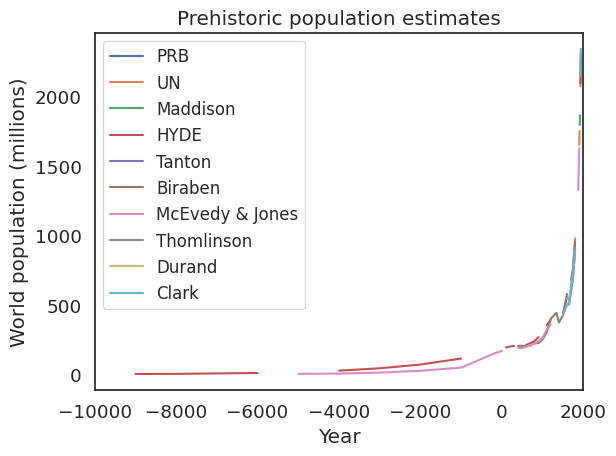

In [47]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year',
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

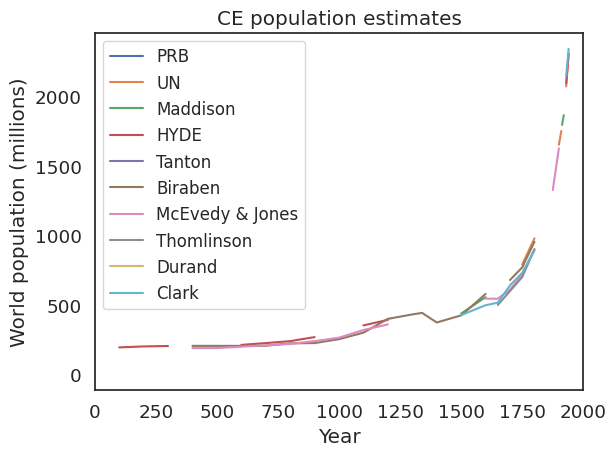

In [48]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year',
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

Based on the plot above, it looks like we may get a pretty decent model by fitting an [exponential model](https://eng.libretexts.org/Bookshelves/Environmental_Engineering_(Sustainability_and_Conservation)/Book%3A_Introduction_to_Environmental_Science_(Zehnder_et_al.)/2%3A_Population_Ecology/2.2%3A_Population_Growth_Models) to the data above. One function that could be helpful for us to use is [the `curve_fit` function from the `scipy` library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). I also leaned on the below online resources for modelling this data


- [StackOverflow post](https://stackoverflow.com/questions/58302771/how-to-fix-runtimewarning-overflow-encountered-in-exp-when-curve-fitting-real)
- [Fitting exponential models to data](https://rowannicholls.github.io/python/curve_fitting/exponential.html)

In [152]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [136]:
# Converting x and y training data into numpy arrays
t_0 = 0
t_end = 1950

# We can take the average population estimate from our population table as our "training" data
dat = table1.loc[t_0:t_end].mean(axis=1)
dat = np.log(dat)
dat.index = dat.index / 1000 # converting dates to not run into memory overflow
dat.tail()

X_train = dat.index.values
y_train = dat.values

array([5.37063803, 5.27299956, 5.37527841, 5.32300998, 5.53733427,
       5.30661617, 5.28826703, 5.36597602, 5.36753244, 5.46489057,
       5.50125821, 5.61749811, 5.78279901, 5.95129338, 6.01126717,
       5.93171454, 6.01737593, 5.91710013, 6.10924758, 6.29986794,
       6.25446963, 6.43320801, 6.62583436, 6.83702621, 6.94889722,
       7.12165625, 7.15148546, 7.18916774, 7.39287841, 7.47505575,
       7.49164547, 7.55000382, 7.60090246, 7.65080312, 7.74565194])

<Axes: xlabel='Year'>

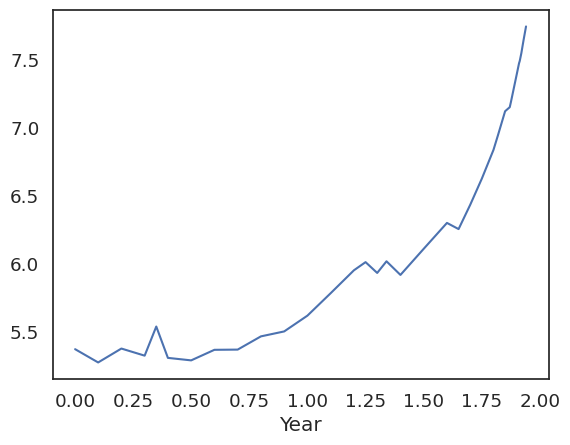

In [137]:
dat.plot()

In [144]:
# First, define our exponential function
def model_func(t, a, b, c):
  return a * np.exp(b * t) + c

# Now, let's
popt, pcov = curve_fit(model_func, X_train, y_train)
a, b, c = popt

print(f"Optimal coefficients for fitting an exponential model: a={a}, b={b}")#, c={c}")

Optimal coefficients for fitting an exponential model: a=0.01801481971554863, b=2.4880597081114684


In [147]:
# Plugging in our timeframe to see what our model predicts
x_test = np.linspace(np.min(X_train), np.max(X_train),len(X_train))
y_pred = model_func(x_test, *popt)#a * np.exp(b * x_test) + c

array([5.37385049, 5.37660374, 5.37977673, 5.38343346, 5.38764766,
       5.39250433, 5.39810142, 5.40455179, 5.41198555, 5.4205526 ,
       5.43042572, 5.44180403, 5.45491699, 5.47002906, 5.48744501,
       5.50751607, 5.53064702, 5.55730435, 5.58802567, 5.62343054,
       5.66423298, 5.71125587, 5.76544753, 5.82790087, 5.89987539,
       5.98282264, 6.07841543, 6.18858162, 6.31554295, 6.4618599 ,
       6.63048328, 6.82481378, 7.04877052, 7.3068701 , 7.60431769])

Now, let's plot our predicted values against our observed data

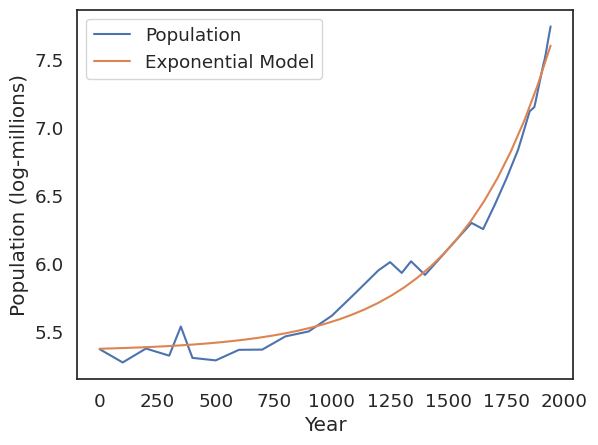

In [151]:
plt.plot(X_train * 1000, y_train, label="Population")
plt.plot(x_test * 1000, y_pred, label="Exponential Model")
plt.ylabel("Population (log-millions)")
plt.xlabel("Year")
plt.legend()
plt.show()

In [157]:
# Evaluate our model
abs_error = y_pred - y_train

se = np.square(abs_error) # squared errors
mse = np.mean(se) # mean squared errors
rmse = np.sqrt(mse) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(abs_error) / np.var(y_train))

# Print out results
print('Parameters:', popt)
print(f'RMSE: {rmse}')
print(f'R-squared: {Rsquared}')

Parameters: [0.01801482 2.48805971 5.35579079]
RMSE: 0.6109173211395803
R-squared: 0.7674877643699889
